# Introdução a Séries Temporais

Tutorial for improve skills: 'Séries Temporais com python/pandas/statsmodels - Parte 09' (ORMaster) by Marcus Mariano

**For more information about Marcus Mariano: [Web site](https://marcusmariano.github.io/mmariano/)**  

**Séries Temporais com python/pandas/statsmodels - Parte 01 [ORMaster.](https://www.youtube.com/playlist?list=PL5fQ3JoS0SZscDaHgXahtx632NMnq5RR-)** 

**ronaldolagepessoa: [GitHub.](https://github.com/ronaldolagepessoa/timeseries)**

## Load packages

In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In [19]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Set parameters

In [3]:
N_THREADS = 6 # threads cnt for lgbm and linear models
N_FOLDS = 10 # folds cnt for AutoML
N_JOBS = -1 # -1 means using all processors
SEED = 0 # fixed random state for various reasons
TEST_SIZE = 0.3 # Test size for metric check
VERBOSE = 1
EPOCHS = 50
TIMEOUT = 600 # Time in seconds for automl run, 600 seconds = 10 minutes
RAM = 16 #  Number of RAM limit
CPU_LIMIT = 16 # Number of CPU limit
TARGET_NAME = 'CHURN'


## Aplicando modelos na bolsa de valores



In [4]:
import pandas_datareader.data as web

# end_date = np.datetime64('today')
end_date = np.datetime64('2020-05-11')
start_date = end_date - np.timedelta64(90, 'D')

# data = web.DataReader("GOOG", "yahoo", start, end)[["Close"]]
data = web.DataReader("GOOG", "yahoo", start_date, end_date)[["Close"]]
print(data.shape)
data.tail()

(63, 1)


,Close
Date,
2020-05-05,1351.109985
2020-05-06,1347.300049
2020-05-07,1372.560059
2020-05-08,1388.369995
2020-05-11,1403.260010


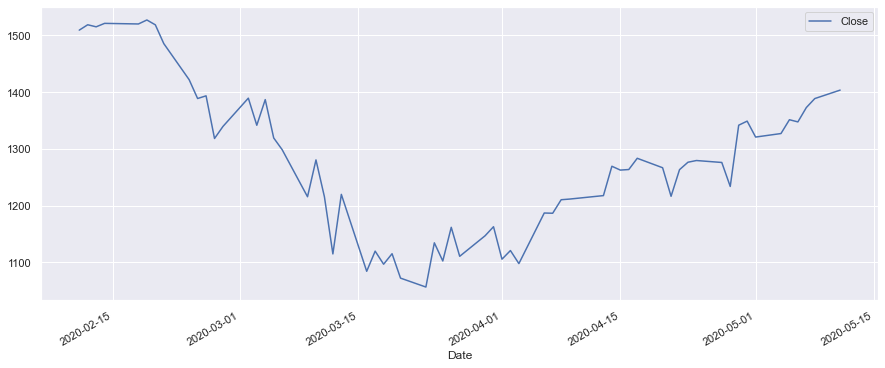

In [25]:
data.plot(figsize=(15, 6));

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

p = 2
max_depth = 3
TEST_SIZE = 1 - 2/3

df1 = data[['Close']].copy()
for i in range(p):
    df1[f'x_{i+1}'] = df1.Close.shift(i + 1)

df1.dropna(axis=0, inplace=True)

X = df1.drop('Close', axis=1)
y = df1.Close

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y, 
#                                                       stratify = y,
                                                      test_size=TEST_SIZE, 
                                                      random_state=SEED) 

# print(f"Train 70%, Valid 30% data: {X_train.shape, X_valid.shape}",\
#                                     y_train.shape, y_valid.shape)

tree_r = DecisionTreeRegressor(max_depth=max_depth, random_state=SEED)
tree_r.fit(X_train, y_train)

MSE = ((y_valid - tree_r.predict(X_valid)) ** 2).mean()

print(f"P value: {p} | Max Deep: {max_depth} | MSE: {MSE}")

P value: 2 | Max Deep: 3 | MSE: 1570.6886624851502


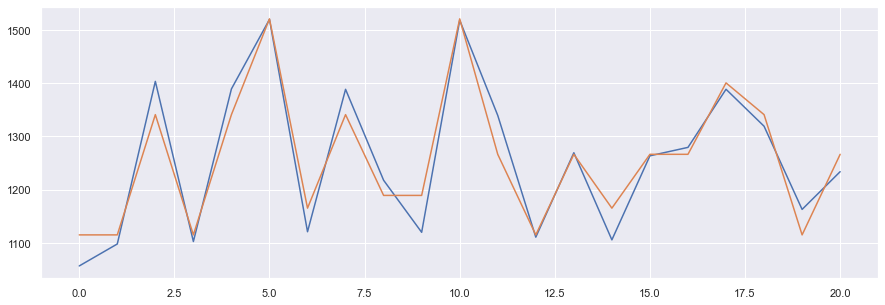

In [7]:
plt.figure(figsize=(15 ,5))

plt.plot(y_valid.values)
plt.plot(tree_r.predict(X_valid));

# ARIMA

In [20]:
from statsmodels.tsa.arima_model import ARIMA 

arima = ARIMA(data.Close, order=(3, 1, 3)).fit()

(arima.resid ** 2).mean()

1487.5245998678088

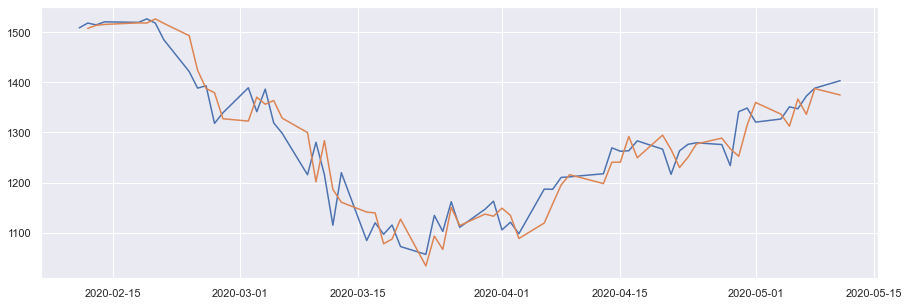

In [13]:
plt.figure(figsize=(15 ,5))

plt.plot(data.Close)
plt.plot(arima.predict(typ='levels'));

In [14]:
arima.forecast()[0]

array([1421.92316143])

# SARIMA

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(data.Close, freq=None, order=(2, 1, 2), seasonal_order=(3, 1, 2, 12)).fit()

(sarima.resid ** 2).mean()

46519.85387692852

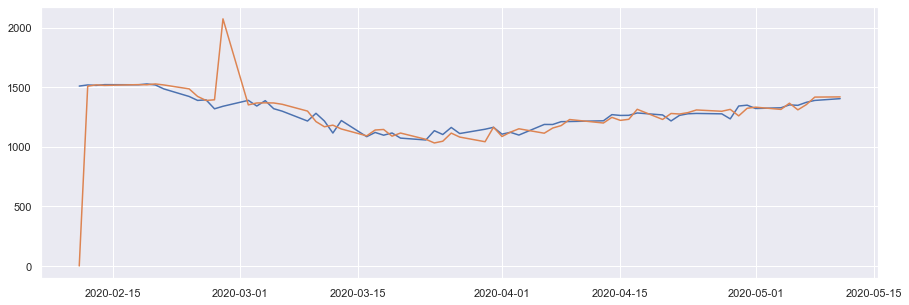

In [31]:
plt.figure(figsize=(15 ,5))

plt.plot(data.Close)
plt.plot(sarima.predict(typ='levels'));

In [32]:
sarima.forecast()

63    1426.268076
dtype: float64